# Major Project

### Fraud Detection on Customer's Ecommerce Transactions Data.

**Problem Statement:**

Below a link to the JSON profiles representing fictional customers from an e-commerce company. The profiles contain information about the customer, their orders, their transactions, what payment methods they used and whether the customer is fraudulent or not.

1) Tasks

 * Provide exploratory analysis of the dataset.
 * Summarise and explain the key trends in the data, providing visualisations and tabular representations as necessary.
 * Explain what factors you think are significant and insignificant in contributing to fraud
 * Construct a model to predict if a customer is fraudulent based on their profile.
 * Report on the models success and show what features are most important


**Importing Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
warnings.filterwarnings('ignore')

**Importing Datasets**

In [18]:
d1 = pd.read_csv("Customer_DF (1).csv")

In [19]:
d1.columns

Index(['Unnamed: 0', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud'],
      dtype='object')

In [20]:
d1.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [21]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
Unnamed: 0                168 non-null int64
customerEmail             168 non-null object
customerPhone             168 non-null object
customerDevice            168 non-null object
customerIPAddress         168 non-null object
customerBillingAddress    168 non-null object
No_Transactions           168 non-null int64
No_Orders                 168 non-null int64
No_Payments               168 non-null int64
Fraud                     168 non-null bool
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [22]:
d1.describe()

,Unnamed: 0,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714
std,48.641546,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000
50%,83.500000,4.000000,3.000000,1.000000
75%,125.250000,5.000000,4.000000,2.000000
max,167.000000,15.000000,8.000000,15.000000


In [23]:
d2 = pd.read_csv('cust_transaction_details (1).csv')

In [24]:
d2.columns

Index(['Unnamed: 0', 'customerEmail', 'transactionId', 'orderId',
       'paymentMethodId', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'transactionAmount',
       'transactionFailed', 'orderState'],
      dtype='object')

In [25]:
d2.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [26]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
Unnamed: 0                          623 non-null int64
customerEmail                       623 non-null object
transactionId                       623 non-null object
orderId                             623 non-null object
paymentMethodId                     623 non-null object
paymentMethodRegistrationFailure    623 non-null int64
paymentMethodType                   623 non-null object
paymentMethodProvider               623 non-null object
transactionAmount                   623 non-null int64
transactionFailed                   623 non-null int64
orderState                          623 non-null object
dtypes: int64(4), object(7)
memory usage: 53.6+ KB


In [27]:
d2.describe()

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


### Exploratory Data Analysis and Data Visualisations

In [28]:
d1['customerEmail'].nunique()

161

In [29]:
d2['customerEmail'].nunique()

136

**As there are total 168 rows in the d1 dataset and we have 161 unique email addresses so some of them must be repeated.**

**Finding out the emails that are repeated in the dataset.**

In [30]:
mail_list=[]
repeat =0
result={}
for i in range(0,168):
    repeat = 0
    for j in range(0,168):
        if d1['customerEmail'][i] == d1['customerEmail'][j]:
            repeat+=1
    result.update({d1['customerEmail'][i]:repeat})
result    

{'josephhoward@yahoo.com': 1,
 'evansjeffery@yahoo.com': 1,
 'andersonwilliam@yahoo.com': 1,
 'rubenjuarez@yahoo.com': 1,
 'uchen@malone.com': 1,
 'robinsoncynthia@dunn.com': 1,
 'samuel15@saunders-rhodes.com': 1,
 'johnlowery@gmail.com': 8,
 'jameslandry@rodriguez.com': 1,
 'ubranch@rivera-parker.info': 1,
 'bowenwilliam@yahoo.com': 1,
 'ksummers@hotmail.com': 1,
 'christineklein@wright-boyd.org': 1,
 'meganwalters@chavez.com': 1,
 'caleb94@sutton.info': 1,
 'gonzalesjackson@gmail.com': 1,
 'dana09@yahoo.com': 1,
 'alec27@bell.com': 1,
 'juliecook@hotmail.com': 1,
 'meganberry@clark.biz': 1,
 'psantiago@nelson.net': 1,
 'harrisnicholas@mitchell-hancock.com': 1,
 'davismike@hotmail.com': 1,
 'guerramichael@hotmail.com': 1,
 'natalie98@yahoo.com': 1,
 'karen54@mullins.biz': 1,
 'avaldez@gmail.com': 1,
 'blackjoel@wright.com': 1,
 'abigail08@yahoo.com': 1,
 'catherine64@gmail.com': 1,
 'romerolauren@hotmail.com': 1,
 'qramsey@hotmail.com': 1,
 '9es7t@u6n7x': 1,
 'ypruitt@hotmail.com': 1,

**From this we can see that 1 email address i.e 'johnlowery@gmail.com' has been repeated 8 times in the dataset.**

In [31]:
d1[d1['customerEmail']=='johnlowery@gmail.com']

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
7,7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,True
40,40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,True
45,45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,True
65,65,johnlowery@gmail.com,04712252182,311kdz4c1210iixltk2j,42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72,"11704 Andrew Villages Apt. 035\nJamesfurt, OR ...",7,5,1,True
79,79,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",2,2,1,True
133,133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True
155,155,johnlowery@gmail.com,076-099-0630x72770,6qy6oa3nqutsyyxzc54c,f259:657f:f329:2fca:c06c:8b57:d6ac:2380,"687 Rogers Bridge Suite 780\nValdezburgh, IN 2...",6,5,3,True
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True


**On furthur checking on this email address we can see that all transactions from this email address are fraudulent.**

Now, doing some analysis in d2, we can see that d2 has **4 unique payment methods** and **most of the payments are made from card**.

In [32]:
d2['paymentMethodType'].unique()

array(['card', 'bitcoin', 'apple pay', 'paypal'], dtype=object)

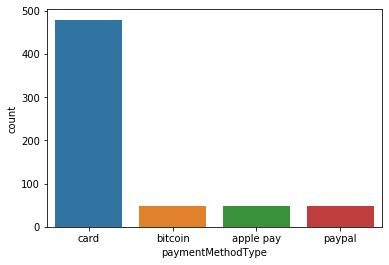

In [33]:
sns.countplot(d2['paymentMethodType'],data = d2)

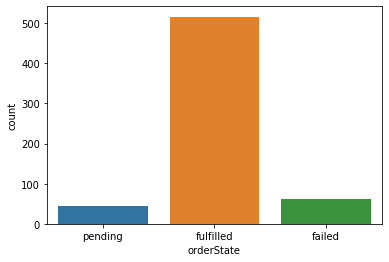

In [34]:
sns.countplot(d2['orderState'])

**We can see that most of the order's are fulfilled and on doing furthur analysis on this we find out:**
1. Orders Fulfilled = 516
2. Order Failed = 63
3. Order Pending = 44

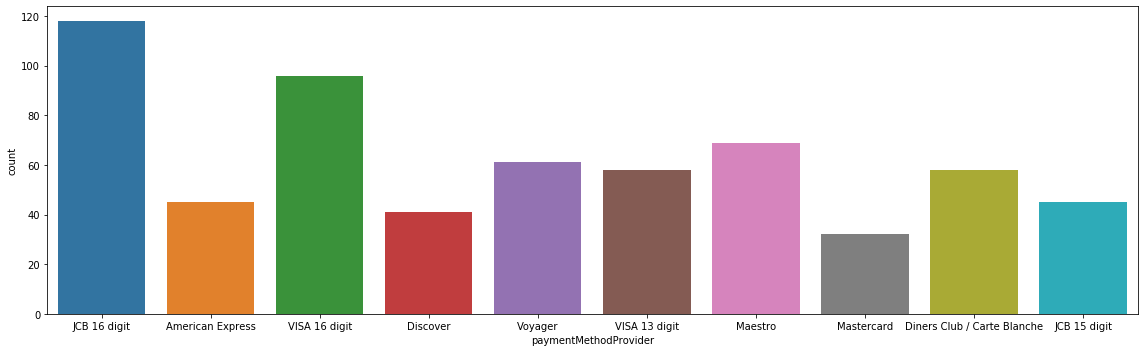

In [35]:
plt.figure(figsize=(16,5))
sns.countplot(d2['paymentMethodProvider'])
plt.tight_layout()

**More Payments were mane by 'JCB 16 digit' and 'VISA 16 digit' as compared to other payment method providers.**

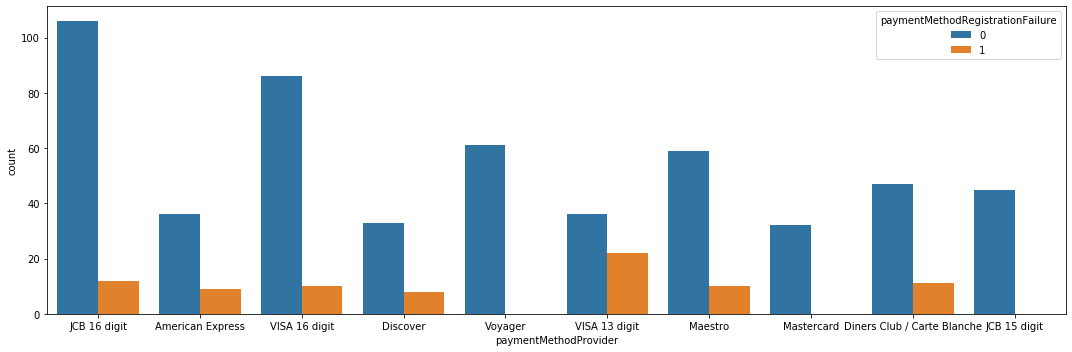

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(d2['paymentMethodProvider'],hue = d2['paymentMethodRegistrationFailure'])
plt.tight_layout()

**This shows that maximum payments were made using 'JCB 16 digit'and 'VISA 13 digit' had most registration failures.**

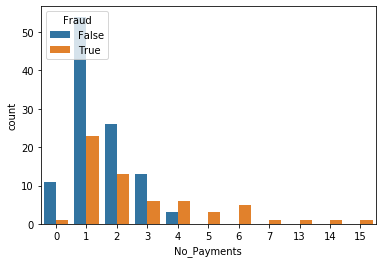

In [37]:
sns.countplot(d1['No_Payments'],hue = d1['Fraud'])

**From this we can see that if the no. of payments is greaten than 5 then the customer is definitely a fraud.**

**Now, finding out the emails that are not common in the 2 datasets.**

In [38]:
l = []
for i in range(0,168):
    uncommon=0
    for j in range(0,623):
        if d1['customerEmail'][i]==d2['customerEmail'][j]:
            uncommon+=1
    if uncommon==0:
        l.append(d1['customerEmail'][i])
print(len(l))
l

25


['ubranch@rivera-parker.info',
 'guerramichael@hotmail.com',
 'zbennett@frazier.com',
 'xwang@white.com',
 'smithtiffany@davis-perkins.com',
 'knichols@gmail.com',
 'gsimpson@cox.org',
 'johnsonjennifer@yahoo.com',
 'whodges@yahoo.com',
 'zthomas@gmail.com',
 'dana23@lawrence.net',
 'brockmatthew@hotmail.com',
 'kevinreyes@johnston.net',
 'michael57@oconnor.com',
 'grace99@wright.com',
 'ukline@spears.biz',
 '3fooiar@6eph',
 'shawseth@stout-novak.com',
 'kellyfrank@atkinson.com',
 'wbeltran@ramirez-shaffer.com',
 'xramos@hardy.net',
 'stephanie21@reyes-spencer.biz',
 'bhorne@fuller-nelson.com',
 'davidwalker@hotmail.com',
 'philipnelson@dean.com']

**These are the 25 emails that are not common in both the datasets so we do not have the transaction details of these customers.**

**To use the elements of both the dataset's we have to find the common emails in both the datasets.**

In [39]:
common =0
for i in d1['customerEmail']:
    for email in d2['customerEmail']:
        if i==email:
            common+=1
            break
common

143

In [40]:
final = d1[d1['customerEmail'].isin(d2['customerEmail'])== True]
final.shape

(143, 10)

**This dataset has common emails from both the datasets.**

In [41]:
final.drop('Unnamed: 0',axis = 1, inplace = True)

In [42]:
final.reset_index(inplace = True)

**Now adding Total Transaction amount column.**

In [43]:
Total_transaction_amt = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==d2['customerEmail'][j]):
            s += d2['transactionAmount'][j]
    Total_transaction_amt.append(s)        


In [44]:
final['Total_transaction_amt'] = Total_transaction_amt

**Now adding No. of Transactions Failed Columns.**

In [45]:
No_transactionsFail = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==d2['customerEmail'][j]):
            s += d2['transactionFailed'][j]
    No_transactionsFail.append(s)        

In [46]:
final['No_transactionsFail'] = No_transactionsFail

**Now adding Payment Method Registration Failures column.**

In [47]:
PaymentRegFail = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==d2['customerEmail'][j]):
            s += d2['paymentMethodRegistrationFailure'][j]
    PaymentRegFail.append(s)  

In [48]:
final['PaymentRegFail'] = PaymentRegFail

**Now adding No. of payments from Paypal, Apple Pay, Card, Bitcoin columns.**

In [49]:
def col_make(column_name,category):
    array = []
    for i in range(0,143):
        s=0
        for j in range(0,623):
            if(final['customerEmail'][i]==d2['customerEmail'][j]):
                if d2[column_name][j]==category:
                    s+=1
        array.append(s)
    return array 

In [50]:
PaypalPayments = col_make('paymentMethodType','paypal')
ApplePayments = col_make('paymentMethodType','apple pay')
BitcoinPayments = col_make('paymentMethodType','bitcoin')
CardPayments = col_make('paymentMethodType','card')

In [51]:
final['PaypalPayments']= PaypalPayments
final['ApplePayments']= ApplePayments
final['CardPayments']= CardPayments
final['BitcoinPayments']= BitcoinPayments

**Now adding Order Fullfilled, Pending, Failed columns.**

In [52]:
OrdersFulfilled = col_make('orderState','fulfilled')
OrdersFailed =  col_make('orderState','failed')
OrdersPending = col_make('orderState','pending')

In [53]:
final['OrdersFulfilled'] = OrdersFulfilled
final['OrdersPending'] = OrdersPending
final['OrdersFailed'] = OrdersFailed

In [54]:
JCB_16 = col_make('paymentMethodProvider','JCB 16 digit')
AmericanExp = col_make('paymentMethodProvider','American Express')
VISA_16 =  col_make('paymentMethodProvider','VISA 16 digit')
Discover =  col_make('paymentMethodProvider','Discover')
Voyager = col_make('paymentMethodProvider','Voyager')
VISA_13 = col_make('paymentMethodProvider','VISA 13 digit')
Maestro = col_make('paymentMethodProvider','Maestro')
Mastercard = col_make('paymentMethodProvider','Mastercard')
DC_CB =col_make('paymentMethodProvider','Diners Club / Carte Blanche')
JCB_15= col_make('paymentMethodProvider','JCB 15 digit')

In [55]:
final['JCB_16'] = JCB_16
final['AmericanExp'] = AmericanExp 
final['VISA_16'] = VISA_16 
final['Discover'] = Discover
final['Voyager'] = Voyager 
final['VISA_13'] = VISA_13
final['Maestro'] = Maestro 
final['Mastercard'] = Mastercard
final['DC_CB'] = DC_CB 
final['JCB_15'] = JCB_15

In [56]:
final.shape

(143, 30)

In [57]:
Trns_fail_order_fulfilled = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==d2['customerEmail'][j]):
            if (d2['orderState'][j]=='fulfilled') & (d2['transactionFailed'][j]==1):
                s+=1
    Trns_fail_order_fulfilled.append(s)

In [58]:
final['Trns_fail_order_fulfilled'] = Trns_fail_order_fulfilled

In [59]:
Duplicate_IP = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerIPAddress'][i]==final['customerIPAddress'][j]):
            s+=1
    s-=1        
    Duplicate_IP.append(s)

In [60]:
final['Duplicate_IP'] = Duplicate_IP

In [61]:
Fraud_Decoded = []
for i in range(0,143):
    s=0
    if(final['Fraud'][i]==True):
        s+=1        
    Fraud_Decoded.append(s)

In [62]:
final['Fraud_Decoded'] = Fraud_Decoded

In [63]:
Duplicate_Address = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerBillingAddress'][i]==final['customerBillingAddress'][j]):
            s+=1
    s-=1        
    Duplicate_Address.append(s)

In [64]:
final['Duplicate_Address']=Duplicate_Address

In [65]:
final[final['Fraud']==True].count()

index                        56
customerEmail                56
customerPhone                56
customerDevice               56
customerIPAddress            56
customerBillingAddress       56
No_Transactions              56
No_Orders                    56
No_Payments                  56
Fraud                        56
Total_transaction_amt        56
No_transactionsFail          56
PaymentRegFail               56
PaypalPayments               56
ApplePayments                56
CardPayments                 56
BitcoinPayments              56
OrdersFulfilled              56
OrdersPending                56
OrdersFailed                 56
JCB_16                       56
AmericanExp                  56
VISA_16                      56
Discover                     56
Voyager                      56
VISA_13                      56
Maestro                      56
Mastercard                   56
DC_CB                        56
JCB_15                       56
Trns_fail_order_fulfilled    56
Duplicat

**Out of 143 data points in the final dataset, 56 data points are Truely fraudulent in the data and rest 87 data points are not fraud.**

In [66]:
final.head()

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,...,0,0,0,0,0,0,0,0,0,0
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,...,0,0,0,0,0,0,1,0,1,0
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,...,0,0,0,0,0,0,2,0,0,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,...,3,0,0,0,0,0,0,0,0,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,...,0,1,0,0,0,0,2,0,1,0


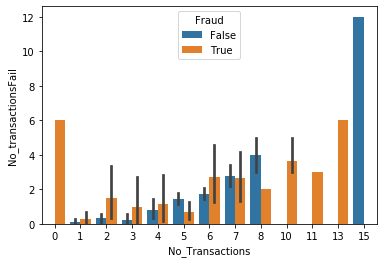

In [67]:
sns.barplot(x = final['No_Transactions'],y = final['No_transactionsFail'],hue = final['Fraud'])

**Note: When number of transactions  = 0, we have number of Transactions failed =6. And hence the customer is definitely a fraud.**

**When No. of Transaction is 10,11,13 then the transaction is definitely a fraud irrespective of the number of transactions failed.**

In [68]:
final[(final['No_transactionsFail'] == 6) & (final['No_Transactions']==0)==True]

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
36,40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,True,...,3,0,5,0,0,0,5,0,1,0
112,133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True,...,3,0,5,0,0,0,5,0,1,0


**It is the same Email Address that has been repeated 8 times in the data.**

In [69]:
print(final['customerPhone'].nunique())
print(final['customerDevice'].nunique())
print(final['customerIPAddress'].nunique())
print(final['customerBillingAddress'].nunique())

143
143
140
141


**As all the Phone Numbers and Devices in the data are unique so they are not of much use in the analysis.**

**We can see that some of the IP Addresses and Billing Addresses are repeated in the data.**

In [70]:
final[final['Duplicate_IP']>0]

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
39,46,jamescampbell@randall-pacheco.biz,599-142-6783,eaul63h9guyvwuymfn3z,45.203.99.249,"29408 Lisa Lock\nPort Jennifer, LA 26501-7040",7,3,2,True,...,0,2,0,0,0,0,4,3,1,0
67,80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,True,...,1,1,0,0,0,0,0,3,1,2
73,88,shelby24@hotmail.com,(071)934-3315x27613,obb41ux0zfa2td5ajo9s,45.203.99.249,"3271 Cynthia Groves\nPort Jeremyberg, CO 27305",5,4,2,True,...,0,0,0,2,3,0,0,3,1,0
118,141,christinemills@mcgee.com,(651)355-4709,zbn9it3s7yl69bjtrnqf,45.203.99.249,"5156 Greene Park Apt. 748\nNew Sandra, CA 1480...",5,5,2,True,...,5,0,0,0,0,0,0,3,1,0


**From this we can see that these 4 customers have the same IP address and as it is not possible for different devices to have the same IP therefore these are definitely fraud.**

In [71]:
final[final['Duplicate_Address']>0]

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
47,57,feliciabrown@gmail.com,(226)129-2677,z7xkuohhjbtiqs6q9rk9,115.137.171.103,49680 Brian Squares Apt. 122\nPort Walterburgh...,1,1,1,True,...,0,0,0,0,0,0,0,0,1,2
67,80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,True,...,1,1,0,0,0,0,0,3,1,2
75,90,brittanydean@hotmail.com,06238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,6,4,1,True,...,6,0,0,0,0,0,2,0,1,2


**These 3 customers have the same Billing Address and hence these 3 are Fraud.**

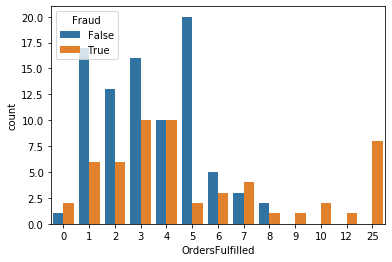

In [72]:
sns.countplot(x = final['OrdersFulfilled'], hue = final['Fraud'])

**From this we can see that if Number of Orders Fulfilled is greater than 8 then the transaction is definitely fraudulent.**

In [73]:
final.columns

Index(['index', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed', 'JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15', 'Trns_fail_order_fulfilled', 'Duplicate_IP', 'Fraud_Decoded',
       'Duplicate_Address'],
      dtype='object')

**Preparing data to feed into model.**

In [74]:
X = final[['No_Transactions',
       'No_Orders', 'No_Payments', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed','Trns_fail_order_fulfilled','Duplicate_IP','Duplicate_Address','JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15']]
y = final['Fraud_Decoded']

**Splitting the data into training and testing set.**

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Model Training

**The model's used are Random Forests, Logistic Regression and Support Vector Machines as all of them are good for binary classification.**

**Training the Random Forest Classifier.**

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

0.8333333333333334
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.75      0.75      0.75        16

    accuracy                           0.83        48
   macro avg       0.81      0.81      0.81        48
weighted avg       0.83      0.83      0.83        48



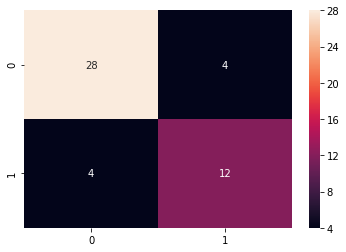

In [78]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test,pred))
sns.heatmap(data = confusion_matrix(y_test,pred),annot = True)
print(classification_report(y_test,pred))

**Training the Logistic Regression Model.**

0.7291666666666666
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.58      0.69      0.63        16

    accuracy                           0.73        48
   macro avg       0.70      0.72      0.71        48
weighted avg       0.74      0.73      0.73        48



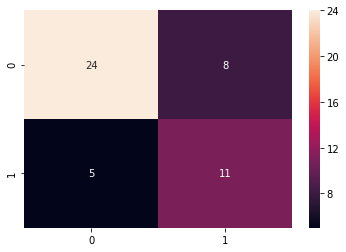

In [79]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)
log_pred =logr.predict(X_test)
print(accuracy_score(y_test,log_pred))
sns.heatmap(data=confusion_matrix(y_test,log_pred),annot = True)
print(classification_report(y_test,log_pred))

**Trainig the Support Vector Machines Ckassifier.**

0.8333333333333334
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.75      0.75      0.75        16

    accuracy                           0.83        48
   macro avg       0.81      0.81      0.81        48
weighted avg       0.83      0.83      0.83        48



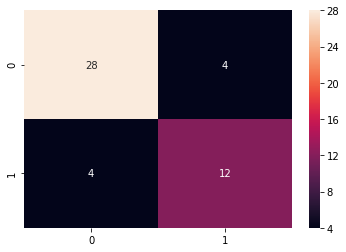

In [80]:
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
print(accuracy_score(y_test,pred))
sns.heatmap(data = confusion_matrix(y_test,pred),annot = True)
print(classification_report(y_test,pred))

**We can see that Logistic Regression Model is giving the best outcome as compared to other models.**

### Hyperparameter Tuning

**Using Grid Search Cross Validation to fine tune the models to improve accuracy.**

**Applying Grid Search CV on Support Vector Classifier.**

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
svc_param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [83]:
gridsvc = GridSearchCV(SVC(),svc_param_grid,refit=True,verbose=3)

In [84]:
gridsvc.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.576, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.581, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.581, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.576, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.581, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.581, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.677, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.581, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.697, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.645, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.419, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.636, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.710, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [85]:
gridsvc.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [86]:
gridsvc.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
grid_svc_predictions = gridsvc.predict(X_test)

0.8333333333333334
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.90      0.56      0.69        16

    accuracy                           0.83        48
   macro avg       0.86      0.77      0.79        48
weighted avg       0.84      0.83      0.82        48



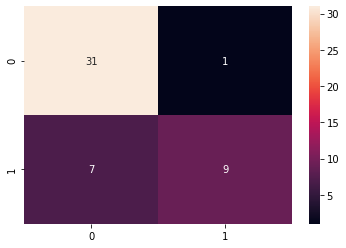

In [88]:
print(accuracy_score(y_test,grid_svc_predictions))
sns.heatmap(data = confusion_matrix(y_test,grid_svc_predictions),annot= True)
print(classification_report(y_test,grid_svc_predictions))

**Applying Grid Search CV on Logistic Regression.**

In [89]:
logr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [90]:
grid_logr = GridSearchCV(LogisticRegression(),logr_param_grid,refit=True,verbose=3)

In [91]:
grid_logr.fit(X_train,y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.576, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.516, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.710, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.727, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.710, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.742, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=1000, score=0.613, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.710, total=   0.0s


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [92]:
grid_logr.best_params_

{'C': 0.1}

In [93]:
grid_logr.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
grid_logr_predictions = grid_logr.predict(X_test)

0.7291666666666666
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.59      0.62      0.61        16

    accuracy                           0.73        48
   macro avg       0.70      0.70      0.70        48
weighted avg       0.73      0.73      0.73        48



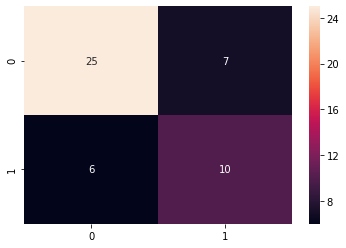

In [95]:
print(accuracy_score(y_test,grid_logr_predictions))
sns.heatmap(data = confusion_matrix(y_test,grid_logr_predictions),annot = True)
print(classification_report(y_test,grid_logr_predictions))

**Applying Grid Search CV on Random Forests Classifier.**

In [96]:
rfc_param_grid = { 
    'n_estimators': [100,150,200,350,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [97]:
grid_rfc = GridSearchCV(RandomForestClassifier(),rfc_param_grid,refit=True,verbose=3)

In [98]:
grid_rfc.fit(X_train,y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.727, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.742, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.806, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.758, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.742, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.806, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.758, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.742, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.839, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=auto

[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.710, total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.774, total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.758, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.710, total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.806, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=500, score=0.758, total=   0.9s
[CV] criterion=gini, max_depth=5, max_features=auto

[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=350, score=0.774, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.788, total=   0.6s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.710, total=   0.8s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.806, total=   0.8s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.758, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.710, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt

[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.742, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.774, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.818, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.710, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.839, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.758, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt

[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, score=0.774, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.788, total=   0.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.677, total=   0.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.806, total=   0.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350, score=0.818, total=   0.5s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350, score=0

[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, score=0.742, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, score=0.806, total=   0.3s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.758, total=   0.5s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.742, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.839, total=   0.6s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.758, total=   0.6s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.727, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.742, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.806, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.758, total=   0.6s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.710, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.839, total=   0.5s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=350, score=0.806, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.788, total=   0.6s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.710, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.806, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.758, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.774, total=   0.1s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, score=0.677, total=   0.6s
[CV] criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, score=0.806, total=   0.5s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.788, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.710, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.774, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, score=0.788, total=   0.2s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=100, score=0.710, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=100, score=0.742, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.788, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.710, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.806, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.788, total=   0.2s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  2.5min finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [99]:
grid_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 150}

In [100]:
grid_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
grid_rfc_predictions = grid_rfc.predict(X_test)

0.875
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        32
           1       0.92      0.69      0.79        16

    accuracy                           0.88        48
   macro avg       0.89      0.83      0.85        48
weighted avg       0.88      0.88      0.87        48



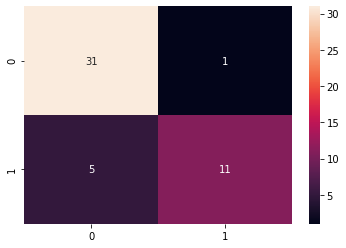

In [102]:
print(accuracy_score(y_test,grid_rfc_predictions))
sns.heatmap(data = confusion_matrix(y_test,grid_rfc_predictions),annot = True)
print(classification_report(y_test,grid_rfc_predictions))

In [103]:
rfc.feature_importances_

array([0.04575255, 0.06146067, 0.16299073, 0.16308601, 0.03118494,
       0.01101877, 0.01597492, 0.01622482, 0.05467431, 0.02028816,
       0.06759667, 0.00753635, 0.03938064, 0.03404456, 0.00903596,
       0.02854077, 0.02848173, 0.01285965, 0.04714115, 0.01897398,
       0.04525544, 0.02417947, 0.02692171, 0.00546857, 0.01432229,
       0.00760518])

**The top 3 features used in the prediction are:**
1. Total Transaction Amount
2. Number Of Payments
3. Orders Fulfilled 

**Applying K Fold Cross Validation on Grid Search Model to check the robustness and quality of the model.**

**Applying Kfold CV on RFC.**

In [104]:
from sklearn.model_selection import cross_val_score
cv_scores_rfc = cross_val_score(grid_rfc, X, y, cv=5)
print(cv_scores_rfc)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_scores_rfc)))

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.789, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.842, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.757, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.789, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.784, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.784, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto

[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.789, total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.757, total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.816, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.757, total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=500, score=0.763, total=   0.6s
[CV] criterion=gini, max_depth=5, max_features=auto

[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=350, score=0.757, total=   0.4s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.737, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.816, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.757, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.711, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.842, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt

[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.842, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.730, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.816, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.703, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt

[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, score=0.703, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.816, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.676, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350, score=0.842, total=   0.4s
[CV] criterion=gini, max_depth=8, max_features=sqrt

[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, score=0.757, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.757, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.789, total=   0.5s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.789, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.757, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.789, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.789, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.757, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=100, score=0.711, total=   0.1s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.816, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.789, total=   0.6s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.757, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.711, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.816, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.784, total=   0.1s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, score=0.730, total=   0.6s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.789, total=   0.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.789, total=   0.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.757, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, score=0.711, total=   0.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, score=0.816, total=   0.2s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=100, score=0.789, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=100, score=0.730, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.737, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.868, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.676, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.789, total=   0.2s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  2.3min finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.711, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.711, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.737, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto

[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.711, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.737, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=500, score=0.711, total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=auto

[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.737, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.789, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.711, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt

[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.789, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.737, total=   0.3s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.816, total=   0.3s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.763, total=   0.3s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.763, total=   0.4s
[CV] criterion=gini, max_depth=7, max_features=sqrt

[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.711, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.763, total=   0.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350, score=0.737, total=   0.4s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350, score=0.737, total=   0.4s
[CV] criterion=gini, max_depth=8, max_features=sqrt

[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.737, total=   0.5s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.737, total=   0.6s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.763, total=   0.5s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.763, total=   0.6s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.737, total=   0.7s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.763, total=   0.6s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.737, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.763, total=   0.6s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=150, score=0.763, total=   0.2s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, score=0.763, total=   0.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, score=0.737, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, score=0.737, total=   0.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=200, score=0.763, total=   0.2s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.737, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.711, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.737, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.711, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.763, total=   0.2s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  2.4min finished


Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.795, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.711, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.684, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.795, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.763, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.684, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.769, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.737, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.684, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto

[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.658, total=   0.3s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.769, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.737, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.684, total=   0.5s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=500, score=0.744, total=   0.9s
[CV] criterion=gini, max_depth=5, max_features=auto

[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=350, score=0.684, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.692, total=   0.7s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.763, total=   0.6s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.684, total=   0.6s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.718, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt

[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.658, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.692, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.684, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.744, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt

[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.718, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.658, total=   0.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350, score=0.744, total=   0.4s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350, score=0.789, total=   0.4s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350, score=0.684, total=   0.4s
[CV] criterion=gini, max_depth=8, max_features=sqrt

[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.769, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.684, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.821, total=   0.5s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500, score=0.684, total=   0.5s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.684, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.769, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.737, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.684, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=100, score=0.744, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.658, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.744, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.684, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=150, score=0.744, total=   0.2s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.711, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, score=0.744, total=   0.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, score=0.711, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, score=0.658, total=   0.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=200, score=0.744, total=   0.2s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.718, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.711, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.658, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.744, total=   0.3s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.658, total=   0.2s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  2.3min finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.795, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.789, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.711, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.795, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.711, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.795, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto

[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.795, total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.789, total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.711, total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.795, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.816, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.711, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto

[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=350, score=0.816, total=   0.4s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=350, score=0.711, total=   0.4s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.795, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.789, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.737, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.795, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt

[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.795, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.842, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt

[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.789, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt

[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, score=0.795, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, score=0.763, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.795, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.737, total=   0.4s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.795, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.816, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.737, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.795, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=350, score=0.789, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=350, score=0.737, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.795, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.789, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.737, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.795, total=   0.1s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, score=0.795, total=   0.5s
[CV] criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, score=0.842, total=   0.5s
[CV] criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.795, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.816, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, score=0.737, total=   0.5s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=100, score=0.795, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=100, score=0.842, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.821, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.789, total=   0.2s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  2.2min finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.795, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.816, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.769, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.789, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, score=0.737, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.795, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.816, total=   0.2s
[CV] criterion=gini, max_depth=4, max_features=auto

[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.769, total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.816, total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=200, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.744, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.816, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=gini, max_depth=5, max_features=auto

[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=350 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.769, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=6, max_features=auto, n_estimators=500, score=0.737, total=   0.5s
[CV] criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, score=0.769, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=sqrt

[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=500, score=0.789, total=   0.5s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.744, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.718, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt

[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, score=0.744, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, score=0.737, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, score=0.816, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.744, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.763, total=   0.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, score=0.763, total=   0.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt

[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, score=0.769, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, score=0.816, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.769, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.816, total=   0.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350, score=0.737, total=   0.4s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, score=0.737, total=   0.2s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.744, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.816, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=350, score=0.737, total=   0.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.769, total=   0.5s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.816, total=   0.5s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=350, score=0.763, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=350 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=350, score=0.763, total=   0.6s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.769, total=   0.7s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.789, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, score=0.737, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=100, score=0.744, total=   0.1s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, score=0.769, total=   0.5s
[CV] criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, score=0.763, total=   0.5s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.744, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.816, total=   0.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, score=0.789, total=   0.6s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=100, score=0.769, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=100, score=0.737, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=100, score=0.816, total=   0.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.718, total=   0.2s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=150, score=0.816, total=   0.2s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  2.2min finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Applying Kfold CV on Logistic Regression.**

In [105]:
cv_scores_logr = cross_val_score(grid_logr, X, y, cv=5)
print(cv_scores_logr)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_scores_logr)))

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.553, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.737, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.541, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.763, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.763, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.730, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.789, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.763, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.757, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.816, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.763, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.684, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.684, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.684, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.684, total=   0.0s
Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.718, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.763, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=100, score=0.684, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.737, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.769, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.684, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.711, total=   0.0s
Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.692, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.684, total=   0.0s
[CV] C=0.001 ....

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.872, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.632, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.684, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.872, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.632, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.684, total=   0.0s
[CV] C=1000 ..........................................................
[CV] .............................. C=1000, score=0.846, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.1, score=0.737, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.763, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.744, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.711, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.789, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.718, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.711, total=   0.0s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Applying Kfold CV on SVC.**

In [106]:
cv_scores_svc = cross_val_score(gridsvc, X, y, cv=5)
print(cv_scores_svc)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_scores_svc)))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.622, total=   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.632, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.658, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.658, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.711, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.737, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.737, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.711, total=   0.0s
[CV] 

[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.658, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.711, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.692, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.658, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.692, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.658, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.658, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] 

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.684, total=   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.605, total=   0.0s
[CV] C=0.1, gamm

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.795, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.763, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.737, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.795, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.737, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.737, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**As all the values in the array are close to each other so we can say that the models are good to use for predictions.**